/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)
Epoch 1/10
1563/1563 [==============================] - 12s 3ms/step - loss: 1.8558 - accuracy: 0.3344
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5233 - accuracy: 0.4615
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4060 - accuracy: 0.4994
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3297 - accuracy: 0.5304
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2640 - accuracy: 0.5560
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2075 - accuracy: 0.5787
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1607 - accuracy: 0.5918
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1161 - accuracy: 0.6105
Epoch 9/10
1563/1563 [==============================] - 

,Actual,Predicted
0,3,3
1,8,1
2,8,1
3,0,0
4,6,4
5,6,6
6,1,1
7,6,6
8,3,3
9,1,1


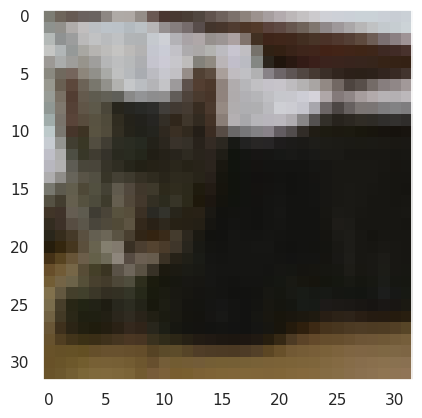

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='dark')
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

cifar10_dataset = keras.datasets.cifar10.load_data()
(X_train, Y_train), (X_test, Y_test) = cifar10_dataset
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
plt.imshow(X_train[9])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

cnn = keras.Sequential([
keras.layers.Conv2D(32, 8, activation='relu', input_shape=(32, 32, 3)),
keras.layers.MaxPool2D(pool_size=2),
keras.layers.Flatten(),
keras.layers.Dense(64, activation='relu'),
keras.layers.Dense(10, activation='softmax')])

cnn.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tf.test.is_gpu_available()
cnn.fit(X_train, Y_train, epochs=10)

Y_prob = cnn.predict(X_test)
Y_pred = Y_prob.argmax(axis=1)
print(Y_pred)

act_pred = pd.DataFrame()
act_pred['Actual'] = Y_test
act_pred['Predicted'] = Y_pred
act_pred.head(10)
